In [33]:
v = 9
T = 12 + 0.5*v
itr = 0.3
n_of_itr = 5

16.5


In [34]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

In [35]:
def tlow(t, coef = 1):
    y = 0.0
    if 0.0<= t <= 10.0:
        y =  1.0
    elif 10.0<t <=20.0:
        y = -t/10.0+2.0
    return y*coef
    
def tmid(t, coef = 1):
    y = 0.0
    if 10.0<= t <= 20.0:
        y = t/10.0-1.0
    elif 20.0<t <=30.0:
        y = -t/10.0+3.0
    return y*coef
def thig(t, coef = 1):
    y = 0.0
    if 20.0<= t <= 30.0:
        y = t/10.0-2.0
    elif 30.0<t<=60.0:
        y =  1.0
    return y*coef

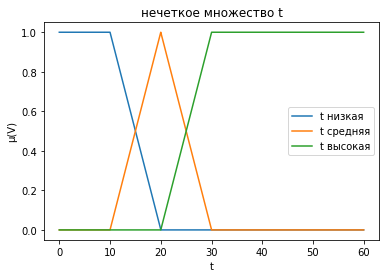

In [36]:
t =  np.arange(0.0, 60.0, 0.01)
plt.plot(t,  np.vectorize(tlow)(t), label='t низкая')
plt.plot(t,  np.vectorize(tmid)(t), label='t средняя')
plt.plot(t,  np.vectorize(thig)(t), label='t высокая')
plt.xlabel('t')
plt.ylabel('μ(V)')
plt.title('нечеткое множество t')
plt.legend()

In [37]:
def vlow(t, coef = 1.0):
    y = 0.0
    if 0.0<= t <= 200.0:
       y = 1.0
    elif 200.0<t <=400.0:
        y = -t/200.0+2.0
    return y*coef
    
def vmid(t, coef = 1):
    y = 0.0
    if 200.0<= t <= 400.0:
        y = t/200.0-1.0
    elif 400.0<t <=600.0:
        y = -t/200.0+3.0
    return y*coef
def vhig(t, coef = 1):
    y = 0.0
    if 400.0<= t <= 600.0:
        y = t/200.0-2.0
    elif 600.0<t<=1000:
        y = 1.0
    return y*coef

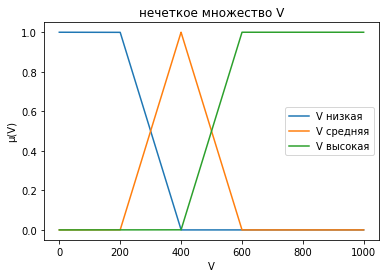

In [38]:
V =  np.arange(0.0, 1000.0, 0.1)
plt.plot(V,  np.vectorize(vlow)(V), label='V низкая')
plt.plot(V,  np.vectorize(vmid)(V), label='V средняя')
plt.plot(V,  np.vectorize(vhig)(V), label='V высокая')
plt.xlabel('V')
plt.ylabel('μ(V)')
plt.title('нечеткое множество V')
plt.legend()

In [39]:
def combine_arrs(a,b):
    if(a.size!=b.size):
        raise TypeError
    output = np.ndarray(shape=(a.size,))
    for i in range(a.size):
        if a[i]>b[i]:
            output[i] =  a[i]
        else:
            output[i] = b[i]
    return output

In [40]:
def calc_voltage(t):
    coef_low = tlow(t)
    coef_mid = tmid(t)
    coef_hig = thig(t)
    vlow_coef = lambda t: vlow(t, coef_low)
    vmid_coef = lambda t: vmid(t, coef_mid)
    vhig_coef = lambda t: vhig(t, coef_hig)
    V =  np.arange(0.0, 1000.0, 0.1)
    low = np.vectorize(vlow_coef)(V)
    mid = np.vectorize(vmid_coef)(V)
    hig = np.vectorize(vhig_coef)(V)
    plt.plot(V, low, label='V низкая')
    plt.plot(V, mid, label='V средняя')
    plt.plot(V, hig, label='V высокая')
    plt.xlabel('V')
    plt.ylabel('μ(V)')
    plt.title('нечеткое множество V')
    plt.show()
    v_total =  combine_arrs(combine_arrs(low, mid), hig)
    plt.plot(V, v_total)
    centroid = round(ndimage.center_of_mass(v_total)[0]/10,1)
    plt.axvline(centroid, label="центр тяжести", color='red')
    plt.xlabel('V')
    plt.ylabel('μ(V)')
    plt.title('V фигура')
    plt.text(centroid+10,0.5, centroid)
    plt.legend()
    plt.show()
    return centroid

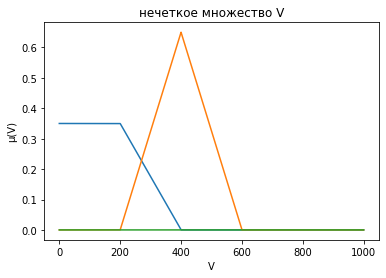

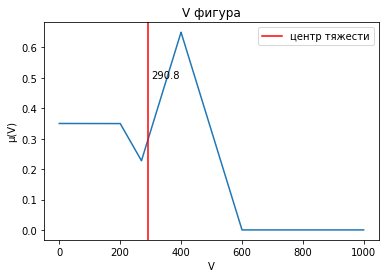

При t = 16.5, скорость вращения вентилятора должна быть 290.8


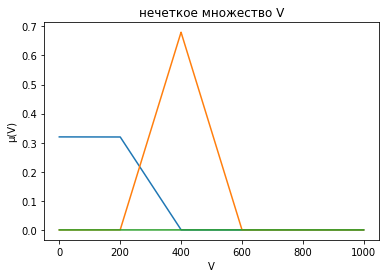

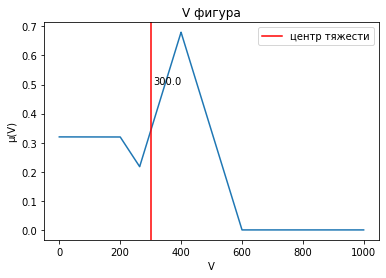

При t = 16.8, скорость вращения вентилятора должна быть 300.0


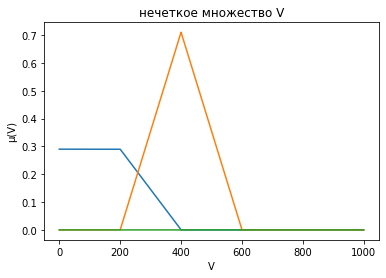

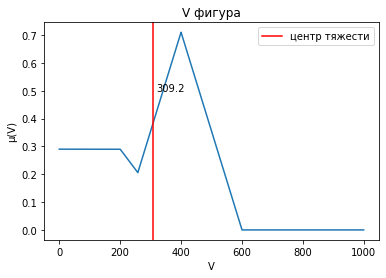

При t = 17.1, скорость вращения вентилятора должна быть 309.2


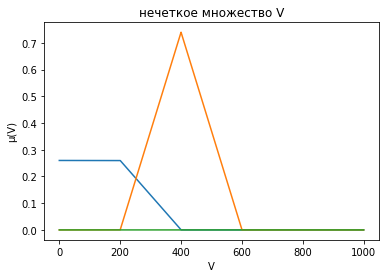

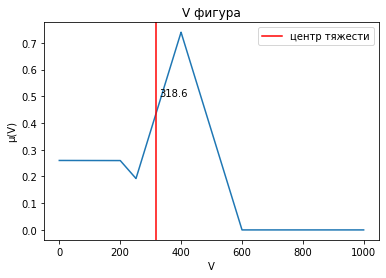

При t = 17.4, скорость вращения вентилятора должна быть 318.6


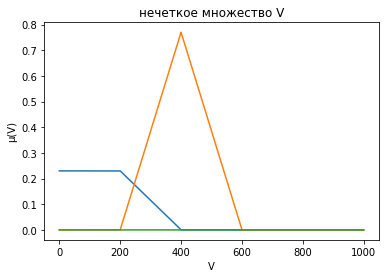

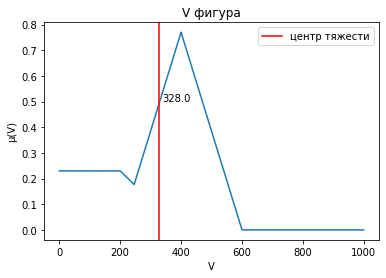

При t = 17.7, скорость вращения вентилятора должна быть 328.0


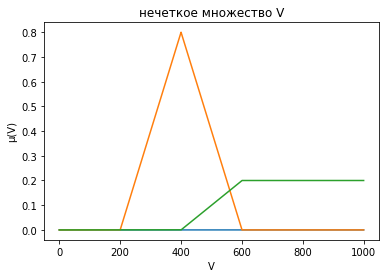

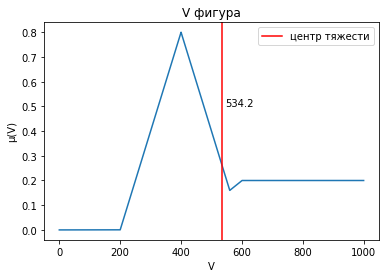

При t = 22, скорость вращения вентилятора должна быть 534.2


In [42]:
values =  np.arange(T, T+itr*n_of_itr, itr)
for i in values:
    print(f'При t = {round(i,1)}, скорость вращения вентилятора должна быть {calc_voltage(round(i,1))}')
    
t_exp = 22
print(f'При t = {t_exp}, скорость вращения вентилятора должна быть {calc_voltage(t_exp)}')